<a href="https://colab.research.google.com/github/rajan083/AIbasedProgramTools/blob/master/AIBasedProgramTools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

a = pd.read_csv('/content/Iris.csv')

x = a.iloc[:,:-1]
y = a.iloc[:,-1]


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_distribution = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': ['auto','sqrt', 'log2'],
    'max_depth': [None]+ list(np.arange(1,20)),
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distribution,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(x,y)

print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 20, 'min_samples_split': 14, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': 14}
0.9800000000000001


In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load data
data = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/iris/iris.csv")

# Print column names
print("Columns in the dataset:", data.columns)

# Split the data into training and testing sets
train, test = data.split_frame(ratios=[0.8], seed=1)

# Identify predictors and response
x = data.columns
y = data.columns[-1]  # Assume the last column is the target
x = x[:-1]  # All columns except the last one

print("Predictors (x):", x)
print("Target (y):", y)

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

# Get the best model
best_model = aml.leader

# Perform predictions on test data
predictions = best_model.predict(test)
print(predictions)

# Get model performance
performance = best_model.model_performance(test)
print(performance)

# Shut down the H2O cluster
h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_njge6m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Columns in the dataset: ['C1', 'C2', 'C3', 'C4', 'C5']
Predictors (x): ['C1', 'C2', 'C3', 'C4']
Target (y): C5
AutoML progress: |████
05:45:36.75: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 126.0.

███████████████████████████████████████████████████████████| (done) 100%
model_id                                                  mean_per_class_error    logloss      rmse        mse
DeepLearning_grid_1_AutoML_1_20240719_54523_model_1                  0.0329268  0.0940725  0.156916  0.0246225
GBM_5_AutoML_1_20240719_54523                                        0.0410569  0.128075   0.18774   0.0352465
DRF_1_AutoML_1_20240719_54523                                        0.0412602  0.0898412  0.171499  0.029412
XGBoost_grid_1_AutoML_1_20240719_54523_model_1                       0.0414634  0.216351   0.22338   0

<ipython-input-19-c14faf86c501>:45: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


In [ ]:
import pandas as pd
import numpy as np
a = pd.read_csv('/content/Iris.csv')

x = a.iloc[:,:-1]
y = a.iloc[:,-1]

from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_distribution = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 5,10,15],
    "min_samples_split": [2,5,10]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_distribution,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
1.0


In [ ]:
from tpot import TPOTClassifier
import pandas as pd
a = pd.read_csv('/content/student_clustering.csv')

x = a.iloc[:,:-1].values
y = a.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50,  random_state=42)
tpot.fit(x_train, y_train)

pre = tpot.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre))

tpot.export('best_model_pipeline.py')

0.125


# **Experiment 1: Automated model selection and hyper parameter tuning using AutoML**

In [ ]:
!pip install TPOT
from tpot import TPOTClassifier
import pandas as pd
a = pd.read_csv('/content/Iris.csv')

x = a.iloc[:,:-1].values
y = a.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50,  random_state=42)
tpot.fit(x_train, y_train)

pre = tpot.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre))

tpot.export('best_model_pipeline.py')

from google.colab import files
files.download('best_model_pipeline.py')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=2bf55f65bf35289a4109310fbcf1bac2447e2a15212aaa75f047a70ad0dfa0e9
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

np.random.seed(42)
x,y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=5, random_state=42)

column_name = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10']
a = pd.DataFrame(data= x, columns = column_name)
a['target']=y
a.to_csv('data.csv', index=False)

from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np

# Initialize H2O
h2o.init()

# Create synthetic data
data = {
    'date': pd.date_range(start='2022-01-01', periods=200, freq='D'),
    'value': np.random.rand(200)
}
df = pd.DataFrame(data)
h2o_data = h2o.H2OFrame(df)

# Extract date features
h2o_data['year'] = h2o_data['date'].year()
h2o_data['month'] = h2o_data['date'].month()
h2o_data['day'] = h2o_data['date'].day()
h2o_data['dayofweek'] = h2o_data['date'].dayOfWeek()

# Split the data into train and test sets
train, test = h2o_data.split_frame(ratios=[0.8])

response = 'value'
predictors = ['year', 'month', 'day', 'dayofweek']

# Initialize and train H2OAutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

# Print leaderboard
lb = aml.leaderboard
print(lb.head())

# Make predictions on test data
preds = aml.leader.predict(test)
performance = aml.leader.model_performance(test)
print(performance)

# Create future dates for prediction
future_dates = pd.DataFrame({
    'date': pd.date_range(start='2022-07-20', periods=10, freq='D')
})

future_h2o = h2o.H2OFrame(future_dates)
future_h2o['year'] = future_h2o['date'].year()
future_h2o['month'] = future_h2o['date'].month()
future_h2o['day'] = future_h2o['date'].day()
future_h2o['dayofweek'] = future_h2o['date'].dayOfWeek()

# Make predictions on future dates
future_preds = aml.leader.predict(future_h2o)
print(future_preds)

# Shut down H2O
h2o.shutdown(prompt=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgxps0trd
  JVM stdout: /tmp/tmpgxps0trd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgxps0trd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,"21 days, 9 hours and 48 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_yufuj5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
06:00:13.863: _train param, Dropping bad and constant columns: [year]

██
06:00:19.340: _train param, Dropping bad and constant columns: [year]
06:00:19.876: _train param, Dropping bad and constant columns: [year]
06:00:19.876: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 168.0.
06:00:19.892: _train param, Dropping unused columns: [year]


06:00:20.176: _train param, Dropping bad and constant columns: [year]

█
06:00:23.752: _train param, Dropping bad and constant columns: [year]

█
06:00:25.763: _train param, Dropping bad and constant columns: [year]
06:00:26.467: _train param, Dropping bad and constant columns: [year]

█
06:00:27.80: _train param, Dropping bad and constant columns: [year]
06:00:27.570: _train param, Dropping unused columns: [year]
06:00:27.809: _train param, Dropping un

<ipython-input-37-eb3d98103109>:58: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


# **Experiment 2: TimeSeries forecasting using AutoML**

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_i3gz6no
  JVM stdout: /tmp/tmp_i3gz6no/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_i3gz6no/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_7156zf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
09:19:24.295: _train param, Dropping bad and constant columns: [year]

██
09:19:32.996: _train param, Dropping bad and constant columns: [year]

█
09:19:34.760: _train param, Dropping bad and constant columns: [year]
09:19:34.760: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 155.0.
09:19:34.880: _train param, Dropping unused columns: [year]
09:19:35.450: _train param, Dropping bad and constant columns: [year]

█
09:19:41.130: _train param, Dropping bad and constant columns: [year]

█
09:19:44.318: _train param, Dropping bad and constant columns: [year]
09:19:45.133: _train param, Dropping bad and constant columns: [year]


09:19:45.833: _train param, Dropping bad and constant columns: [year]
09:19:46.301: _train param, Dropping unused columns: [year]
09:19:46.552: _train param, Dropping u

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


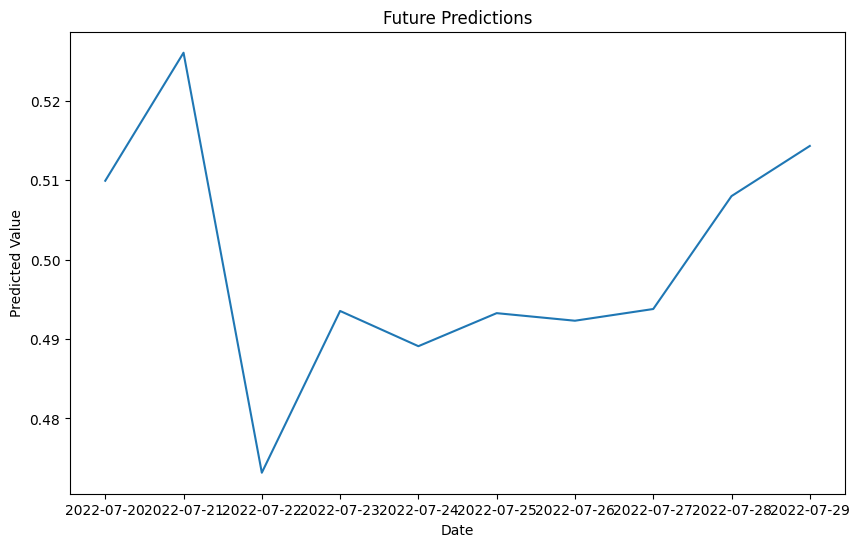

H2O session _sid_b327 closed.


<ipython-input-1-55b4ff23b465>:71: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize H2O
h2o.init()

# Create synthetic data
data = {
    'date': pd.date_range(start='2022-01-01', periods=200, freq='D'),
    'value': np.random.rand(200)
}
df = pd.DataFrame(data)
h2o_data = h2o.H2OFrame(df)

# Extract date features
h2o_data['year'] = h2o_data['date'].year()
h2o_data['month'] = h2o_data['date'].month()
h2o_data['day'] = h2o_data['date'].day()
h2o_data['dayofweek'] = h2o_data['date'].dayOfWeek()

# Split the data into train and test sets
train, test = h2o_data.split_frame(ratios=[0.8])

response = 'value'
predictors = ['year', 'month', 'day', 'dayofweek']

# Initialize and train H2OAutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

# Print leaderboard
lb = aml.leaderboard
print(lb.head())

# Make predictions on test data
preds = aml.leader.predict(test)
performance = aml.leader.model_performance(test)
print(performance)

# Create future dates for prediction
future_dates = pd.DataFrame({
    'date': pd.date_range(start='2022-07-20', periods=10, freq='D')
})

future_h2o = h2o.H2OFrame(future_dates)
future_h2o['year'] = future_h2o['date'].year()
future_h2o['month'] = future_h2o['date'].month()
future_h2o['day'] = future_h2o['date'].day()
future_h2o['dayofweek'] = future_h2o['date'].dayOfWeek()

# Make predictions on future dates
future_preds = aml.leader.predict(future_h2o)
print(future_preds)

# Convert H2OFrames to DataFrames for plotting
future_df = future_h2o.as_data_frame()
future_preds_df = future_preds.as_data_frame()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(future_df['date']), future_preds_df['predict'])
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Predictions')
plt.show()

# Shut down H2O
h2o.shutdown(prompt=False)

# **Experiment 3: Hyperparameter Tuning on Grid Search, Random Search, Bayesian optimization and analysis**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
a = pd.read_csv('/content/Social_Network_Ads.csv')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a['Gender'] = le.fit_transform(a['Gender'])

x = a.iloc[:,:-1].values
y = a.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)



Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9125


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
!pip install scikit-learn scikit-optimize

In [ ]:
from skopt import BayesSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
a = pd.read_csv('/content/Social_Network_Ads.csv')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a['Gender'] = le.fit_transform(a['Gender'])

x = a.iloc[:,:-1].values
y = a.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)


#Grid Search
def grid_search():
  from sklearn.model_selection import GridSearchCV

  param ={
      "n_estimators":[100,200,300],
      "max_depth":[10,20,30],
      "min_samples_split":[2,5,10]
  }
  grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid = param, cv = 5)
  grid_search.fit(x_train, y_train)
  best_param = grid_search.best_params_
  best_score = grid_search.best_score_
  print(f'\nGrid Search Best Parameters: {best_param}')
  print(f'Grid Search Best Score: {best_score}')
  return grid_search

grid_search()



#Bayesian Optimisation
def bayesian_opt():
  from skopt.space import Real, Integer, Categorical
  param = {
      'n_estimators': Integer(10,100),
      'max_depth': Integer(1,50),
      'min_samples_split': Integer(2,10),
      'bootstrap': Categorical([True, False])
  }
  rf = RandomForestClassifier(random_state=42)
  bayes_search = BayesSearchCV(
      estimator = rf,
      search_spaces = param,
      n_iter = 4,
      cv = 5,
      n_jobs = -1,
      random_state = 42
  )

  bayes_search.fit(x_train, y_train)
  best_param = bayes_search.best_params_
  best_score = bayes_search.best_score_
  print(f'\nBayesian optimiser Best Parameters: {best_param}')
  print(f'Bayesian optimiser Best Score: {best_score}')

  return bayesian_opt

bayesian_opt()

#Random Search
def random_search():
  from sklearn.model_selection import RandomizedSearchCV
  param = {
        'n_estimators': [100,200,300],
        'max_depth': [10,20,30],
        'min_samples_split':[2,5,10]
  }
  random_search = RandomizedSearchCV(
      estimator = RandomForestClassifier(),
      param_distributions = param,
      n_iter = 10,
      cv = 5,
      n_jobs = -1,
      random_state = 42
    )
  random_search.fit(x_train, y_train)

  best_param = random_search.best_params_
  best_score = random_search.best_score_
  print(f'\nRandom Search Best Parameters: {best_param}')
  print(f'Random Search Best Score: {best_score}')

  return random_search

random_search()


Grid Search Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Grid Search Best Score: 0.9125

Bayesian optimiser Best Parameters: OrderedDict([('bootstrap', True), ('max_depth', 37), ('min_samples_split', 9), ('n_estimators', 38)])
Bayesian optimiser Best Score: 0.903125

Random Search Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}
Random Search Best Score: 0.909375


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

# **Experiment 4: Derive insights from images using pre-trained API**


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


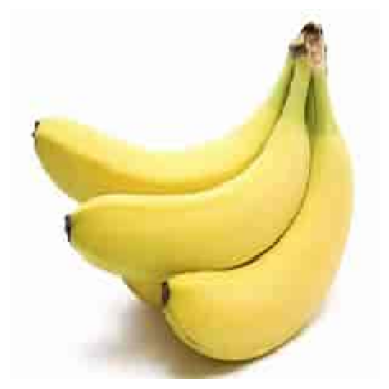

Predictions:
banana: 0.9530033469200134
chambered_nautilus: 0.0025583775714039803
butternut_squash: 0.002555692568421364
conch: 0.002258219989016652
clog: 0.0021690004505217075

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


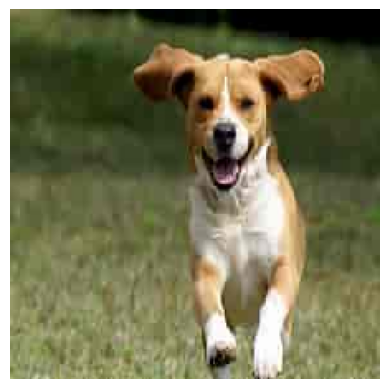

Predictions:
beagle: 0.32344457507133484
Cardigan: 0.09653928130865097
English_foxhound: 0.07761333882808685
American_Staffordshire_terrier: 0.04400264099240303
Staffordshire_bullterrier: 0.038729190826416016

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


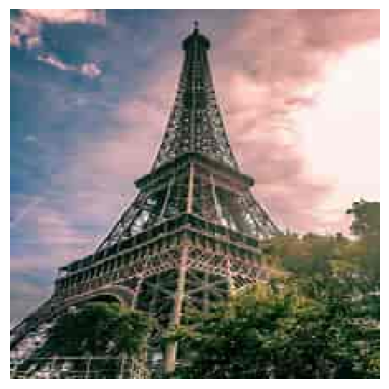

Predictions:
bell_cote: 0.43881139159202576
palace: 0.11145086586475372
stupa: 0.0821605771780014
church: 0.02224639430642128
carousel: 0.013666287064552307

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


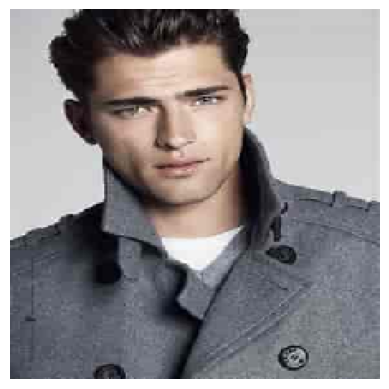

Predictions:
military_uniform: 0.7645626068115234
trench_coat: 0.07042530179023743
suit: 0.0506732203066349
bulletproof_vest: 0.03351878747344017
sunglasses: 0.0033528446219861507

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


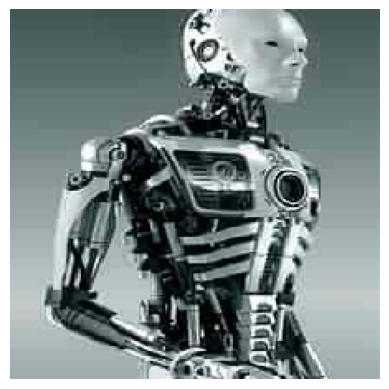

Predictions:
projector: 0.06847555190324783
breastplate: 0.05392947793006897
bicycle-built-for-two: 0.028673898428678513
cuirass: 0.026073245331645012
sax: 0.02430417761206627

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


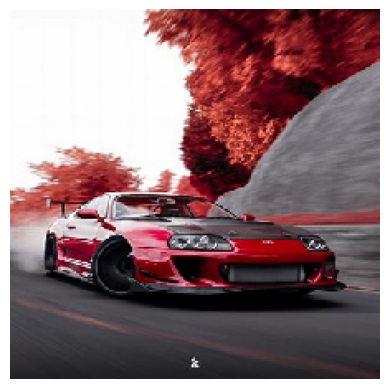

Predictions:
sports_car: 0.5965529084205627
racer: 0.12518592178821564
convertible: 0.0764467865228653
car_wheel: 0.04164014756679535
fire_engine: 0.006892971228808165

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


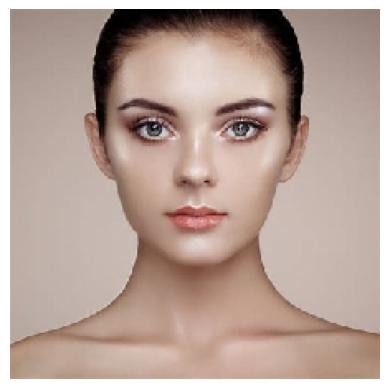

Predictions:
bow_tie: 0.05656339228153229
suit: 0.04344955086708069
abaya: 0.04261511564254761
mask: 0.03397069126367569
brassiere: 0.029591599479317665



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.applications.MobileNetV2(weights='imagenet')

img_paths = ['/content/banana.jpg','/content/dog.jpg','/content/eiffel tower.jpg','/content/men.jpg','/content/robot.jpg','/content/supra.jpg','/content/women.jpg']

for image_path in img_paths:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    input_image = tf.keras.preprocessing.image.img_to_array(img)
    input_image = tf.keras.applications.mobilenet_v2.preprocess_input(input_image)
    input_image = tf.expand_dims(input_image, axis=0)

    predictions = model.predict(input_image)
    predicted_classes = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=5)[0]
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print('Predictions:')
    for _, class_name, probability in predicted_classes:
        print(f'{class_name}: {probability}')
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


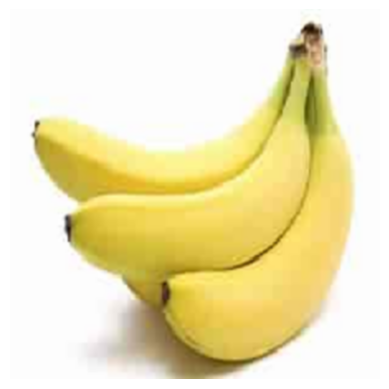

Predictionos: 
banana:0.9530030488967896
chambered_nautilus:0.0025584036484360695
butternut_squash:0.0025557002518326044
conch:0.002258253749459982
clog:0.002169008133932948

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


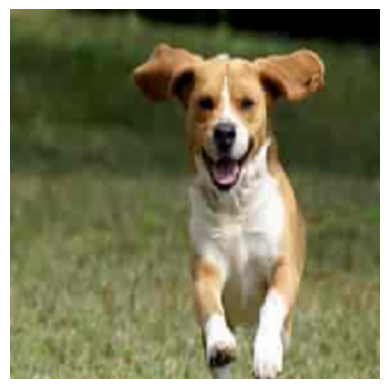

Predictionos: 
beagle:0.3234439492225647
Cardigan:0.0965396910905838
English_foxhound:0.0776134803891182
American_Staffordshire_terrier:0.044002700597047806
Staffordshire_bullterrier:0.03872920945286751

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


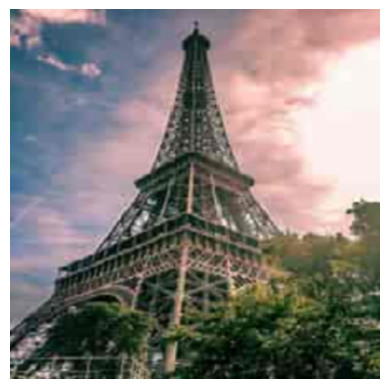

Predictionos: 
bell_cote:0.4388106167316437
palace:0.11145052313804626
stupa:0.08216133713722229
church:0.022246303036808968
carousel:0.013666249811649323

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


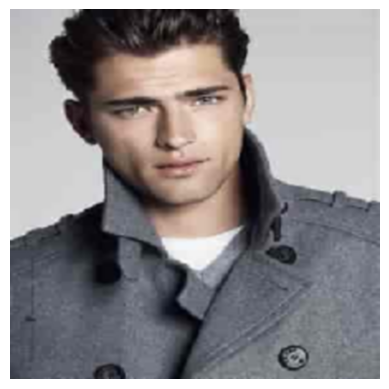

Predictionos: 
military_uniform:0.7645610570907593
trench_coat:0.07042573392391205
suit:0.050673581659793854
bulletproof_vest:0.033518772572278976
sunglasses:0.0033528695348650217

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


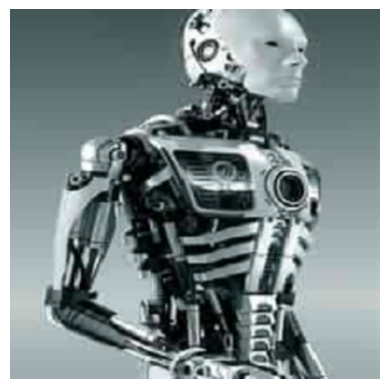

Predictionos: 
projector:0.06847580522298813
breastplate:0.05392929166555405
bicycle-built-for-two:0.028673823922872543
cuirass:0.0260731540620327
sax:0.024304242804646492

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


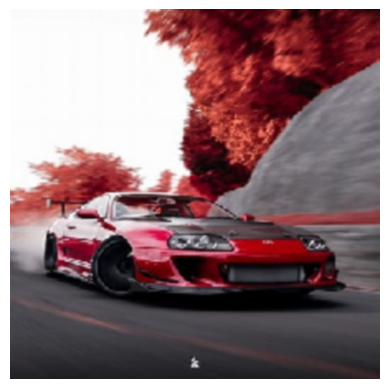

Predictionos: 
sports_car:0.5965522527694702
racer:0.1251862645149231
convertible:0.07644674181938171
car_wheel:0.04164035990834236
fire_engine:0.006892996374517679

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


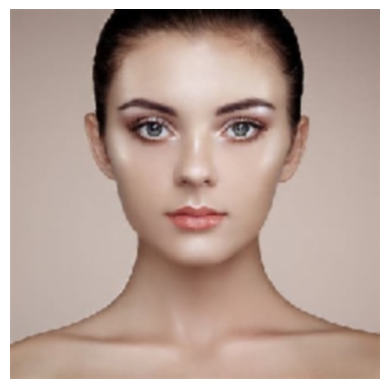

Predictionos: 
bow_tie:0.056563228368759155
suit:0.043449610471725464
abaya:0.042614784091711044
mask:0.03397078439593315
brassiere:0.02959144301712513



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.applications.MobileNetV2(weights='imagenet')

img_paths = ['/content/banana.jpg','/content/dog.jpg','/content/eiffel tower.jpg','/content/men.jpg','/content/robot.jpg','/content/supra.jpg','/content/women.jpg']

for image_path in img_paths:
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
  input_image = tf.keras.preprocessing.image.img_to_array(img)
  input_imgage = tf.keras.applications.mobilenet_v2.preprocess_input(input_image)
  input_image = tf.expand_dims(input_image, axis=0)
  predictions = model.predict(input_image)
  predicted_classes = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top= 5)[0]
  plt.imshow(img,interpolation='bicubic')
  plt.axis('off')
  plt.show()
  print('Predictionos: ')
  first_prediction = True
  for _ ,class_name, probablity in predicted_classes:
    if first_prediction:
      print(f'{class_name}:{probablity}')
      first_prediction = False
    else:
      print(f'{class_name}:{probablity}')
  print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


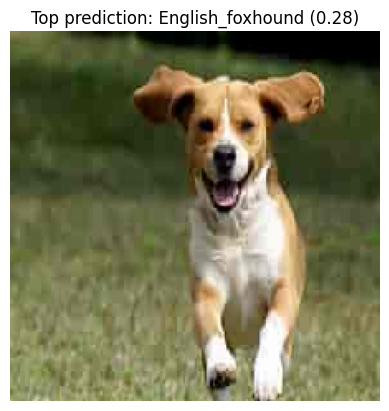

Processed Image 1:
1. English_foxhound (0.28)
2. beagle (0.17)
3. basenji (0.10)
4. Walker_hound (0.08)
5. Labrador_retriever (0.08)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


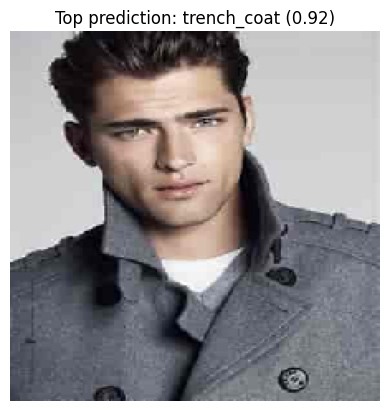

Processed Image 2:
1. trench_coat (0.92)
2. military_uniform (0.07)
3. bulletproof_vest (0.01)
4. assault_rifle (0.00)
5. suit (0.00)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


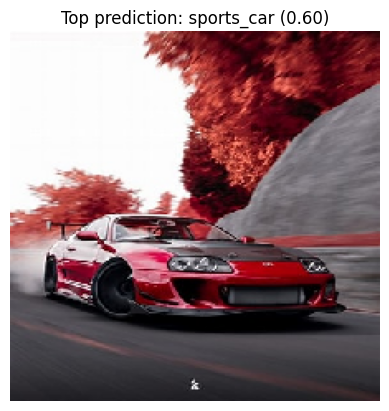

Processed Image 3:
1. sports_car (0.60)
2. racer (0.35)
3. convertible (0.03)
4. car_wheel (0.02)
5. beach_wagon (0.00)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


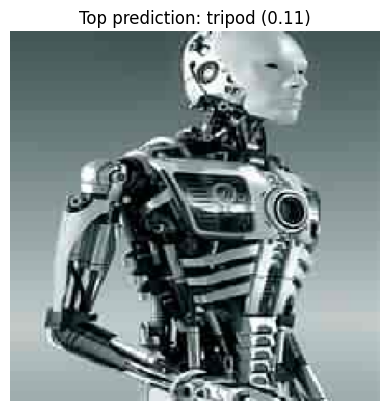

Processed Image 4:
1. tripod (0.11)
2. bulletproof_vest (0.09)
3. breastplate (0.08)
4. cuirass (0.08)
5. reflex_camera (0.04)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


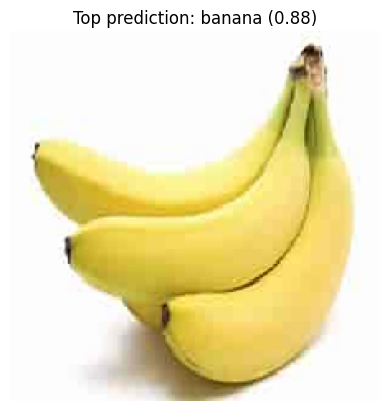

Processed Image 5:
1. banana (0.88)
2. lemon (0.01)
3. tennis_ball (0.01)
4. spaghetti_squash (0.01)
5. clog (0.01)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


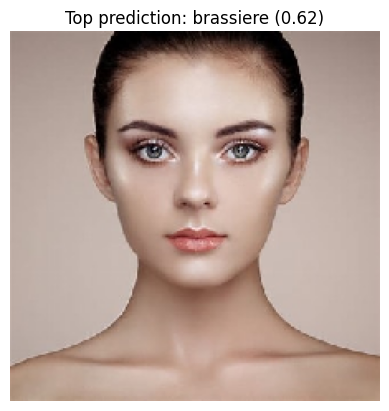

Processed Image 6:
1. brassiere (0.62)
2. gown (0.06)
3. wig (0.05)
4. diaper (0.04)
5. overskirt (0.03)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


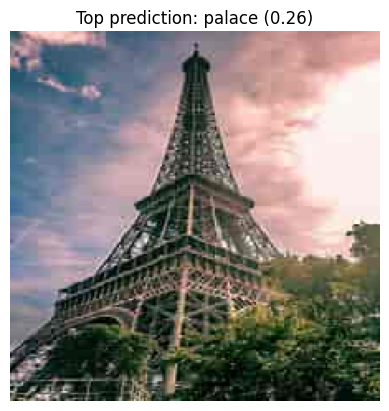

Processed Image 7:
1. palace (0.26)
2. bell_cote (0.23)
3. church (0.10)
4. stupa (0.09)
5. castle (0.04)


Processed 7 images out of 7 found.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Predict image function
def predict_image(img_path, top_n=5):
    img = image.load_img(img_path, target_size=(224, 224))
    x = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
    preds = model.predict(x)
    return decode_predictions(preds, top=top_n)[0], img

# Unzip and process images
image_zip_path = "/content/image_recognition.zip"
extract_dir = "/content/extracted_images"
with zipfile.ZipFile(image_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

image_count = 0
for root, _, files in os.walk(extract_dir):
    for image_name in files:
        image_path = os.path.join(root, image_name)
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                predictions, img = predict_image(image_path)

                # Display the image
                plt.imshow(img)
                plt.title(f"Top prediction: {predictions[0][1]} ({predictions[0][2]:.2f})")
                plt.axis('off')
                plt.show()

                image_count += 1
                print(f"Processed Image {image_count}:")
                for i, (_, label, score) in enumerate(predictions):
                    print(f"{i+1}. {label} ({score:.2f})")
                print()
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

print(f"\nProcessed {image_count} images out of {len(files)} found.")


In [ ]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
import cv2
import mediapipe as mp

fd = mp.solutions.face_detection

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from mtcnn import MTCNN  # MTCNN for face detection

# Load pre-trained model (e.g., fine-tuned MobileNet)
model = tf.keras.models.load_model('defect_detection_model.h5')

# Initialize MTCNN face detector
detector = MTCNN()

# Load an image
image = cv2.imread('face_image.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect faces in the image
faces = detector.detect_faces(rgb_image)

# Process each face
for face in faces:
    x, y, width, height = face['box']
    face_image = rgb_image[y:y+height, x:x+width]
    face_resized = cv2.resize(face_image, (224, 224))  # Resize to the model's input size
    face_normalized = face_resized / 255.0
    face_input = np.expand_dims(face_normalized, axis=0)

    # Predict defects
    predictions = model.predict(face_input)
    if predictions[0][0] > 0.5:
        label = "Defect"
    else:
        label = "No Defect"

    # Draw bounding box and label
    cv2.rectangle(image, (x, y), (x+width, y+height), (255, 0, 0), 2)
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

# Display the output
cv2.imshow('Face Defects Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!pip install textblob
!pip install nltk

In [ ]:
!python -m textblob.download_corpora
                    #for pos_tag have to download this

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


# **Experiment 5: Sentiment analysis using TextBLob, Explain Polarity and Subjectivity.**

In [ ]:
from textblob import TextBlob
text = TextBlob("the product works fine, and is to expensive")
print(text.sentiment)
polarity = text.sentiment.polarity
if polarity > 0:
  print("Polarity: Positive")
else:
  print("Polarity: Negative")

subjectivity = text.sentiment.subjectivity
if subjectivity > 0.5:
  print("Subjectivity: Subjective")
else:
  print("Subjectivity: Objective")

Sentiment(polarity=-0.04166666666666666, subjectivity=0.6)
Polarity: Negative
Subjectivity: Subjective


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=73a437afd55a8c2b736c50ad25e8e499050931d98fdbd7d445a373ada98b8728
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
text = "por favor"
translated = text.translate()

pr

pt


In [ ]:
import nltk

nltk.download("punkt")                          #for tokenization
nltk.download("averaged_perceptron_tagger")     #for POS
nltk.download("stopwards")                      #for stopwords
nltk.download("wordnet")                        #for lemmatization
nltk.download("vader_lexicon")                  #for sentiments
nltk.download("maxent_ne_chunker")
nltk.download("words")                          #name entity recongnition

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "Hey guys!. This is me, Simon minter"
word = word_tokenize(text)
sent = sent_tokenize(text)
pos = nltk.pos_tag(word)

print(sent)
print(word)
print(pos)

['Hey guys!.', 'This is me, Simon minter']
['Hey', 'guys', '!', '.', 'This', 'is', 'me', ',', 'Simon', 'minter']
[('Hey', 'NNP'), ('guys', 'NN'), ('!', '.'), ('.', '.'), ('This', 'DT'), ('is', 'VBZ'), ('me', 'PRP'), (',', ','), ('Simon', 'NNP'), ('minter', 'NN')]


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
text = list(map(str, input().split()))
stemmed = [ps.stem(word) for word in text]
print(stemmed)

flowing drowning runnig
['flow', 'drown', 'runnig']


In [ ]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
words = list(map(str, input().split()))
lemmatized = [lemma.lemmatize(word, pos='v') for word in words]
print(lemmatized)

run, ran running, go went gone
['run,', 'run', 'running,', 'go', 'go', 'go']


In [ ]:
from nltk import word_tokenize, pos_tag ,ne_chunk
text = "Chandigarh University does not deal with clients, it deals with body that pays"
word = word_tokenize(text)
pos = pos_tag(word)
ne = ne_chunk(pos)

print(ne)

(S
  (PERSON Chandigarh/NNP)
  (ORGANIZATION University/NNP)
  does/VBZ
  not/RB
  deal/VB
  with/IN
  clients/NNS
  ,/,
  it/PRP
  deals/VBZ
  with/IN
  body/NN
  that/WDT
  pays/VBZ)


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Chandigarh Univeristy does not deal with clients, it deals with body that pays"
doc = nlp(text)
for token in doc:
  print(token.text)

Chandigarh
Univeristy
does
not
deal
with
clients
,
it
deals
with
body
that
pays
